### Coursework EMAT30008 2024 ###
Student no: 2113223

## Demos ##

In [72]:
import solvers
import numpy as np
import matplotlib.pyplot as plt

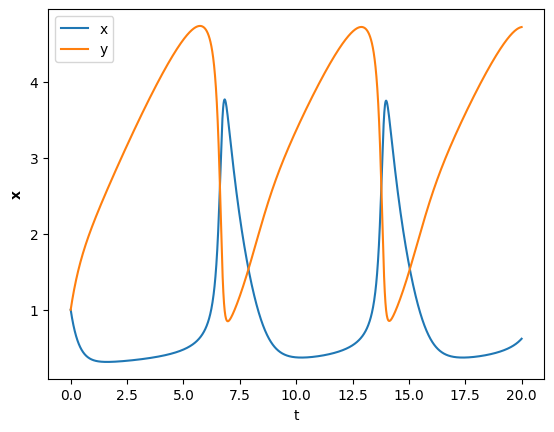

In [73]:
#Question 1
#a)
#Set up the Brusselator system as a function of x (numpy array), t (float) and parameters (numpy array)
def brusselator(x, t, p):
    dx = p[0] + x[0]**2 * x[1] - (p[1] + 1) * x[0]
    dy = p[1] * x[0] - x[0]**2 * x[1]
    return np.array([dx, dy])

#define paramaters A and B and form parameter array p
A = 1
B = 3
p = np.array([A, B])

#Set up the initial conditions
x0 = np.array([1, 1])

#Set up t0 and t_f
t0 = 0
t_f = 20

#Choose the time increment delta_max
delta_max = 1e-2

#Solve system using the RK4 method
x, t = solvers.solve_to(brusselator,p, x0, t0, t_f, delta_max, solver = 'RK4')

#plot the time series of x and y against t
plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.show()


In [74]:
#b)
#From the plot of the time series of x and y against t, we can that the period T of the oscillations is approximately 7.5.
#Thus the initial guess for the period T0 is 7.5
T0 = 7.5

#We will us the shooting method to find the period T of the oscillations
#We will use the default phase condition, i.e. dx/dt = 0 at t = 0

x,T = solvers.shoot_solve(brusselator, p, x0,T0, delta_max, solver = 'RK4')

print(T)

7.156932336553665


[0.37053757 3.51168028 7.15693234]
[1.         2.         6.99213387]
[1.         2.04166667 6.96594694]
[1.         2.08333333 6.93639523]
[1.         2.125      6.90209643]
[1.         2.16666667 6.86148814]
[1.         2.20833333 6.81293919]
[1.         2.25       6.75487384]
[1.         2.29166667 6.68574539]
[1.         2.33333333 6.60344463]
[1.         2.375      6.50322173]
[1.         2.41666667 6.37094801]
[1.         2.45833333 6.13719788]
[1.        2.5       5.5280706]
[1.         2.54166667 5.37180542]
[1.         2.58333333 5.34895862]
[1.         2.625      5.32804557]
[1.         2.66666667 5.30496059]
[1.         2.70833333 5.28015122]
[1.         2.75       5.25424087]
[1.         2.79166667 5.22805547]
[1.         2.83333333 5.20249285]
[1.         2.875      5.17836575]
[1.         2.91666667 5.15623193]
[1.         2.95833333 5.13616003]


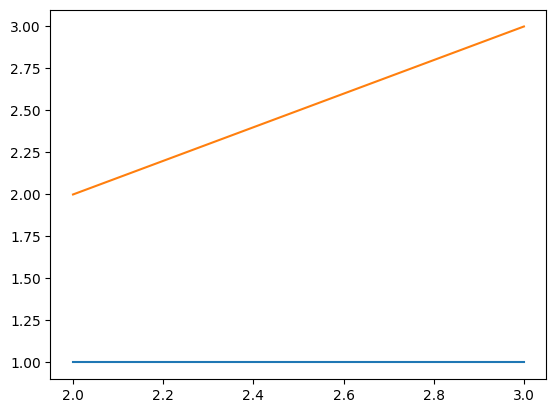

In [76]:
#c)
B0 = 2
Bf = 3
p0 = np.array([A, B0])
pend = np.array([A, Bf])
#Use the output of shooting method as first guess for the natural parameter continuation
#We use natural parameter continuation to find the branch of LCs that emerges from the Hopf bifurcation at B = 2
xs, Ts, ps = solvers.natural_p_cont(brusselator, p0, pend, x, LC = True, T0 = T)

plt.figure()
plt.plot(ps[1,:], xs[0,:])
plt.plot(ps[1,:], xs[1,:])
plt.show()

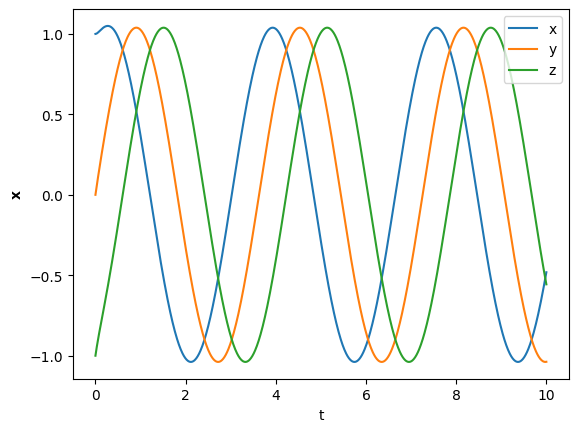

In [77]:
#Question 2
#Set up the extended Hopf Bifurcation normal form
def hopf(x, t, p):
    r_squared = (x**2).sum()
    dx = p[0] * x[0] - x[1] - x[2] + x[0] * r_squared - x[0] * r_squared**2
    dy = x[0] + p[0] * x[1] - x[2] + x[1] * r_squared - x[1] * r_squared**2
    dz = x[0] + x[1] + p[0] * x[2] + x[2] * r_squared - x[2] * r_squared**2
    return np.array([dx, dy, dz])

#a)
beta = 1
t0 = 0
t_f = 10
x0 = np.array([1, 0, -1])
p = np.array([beta])
x, t = solvers.solve_to(hopf, p, x0, t0, t_f, delta_max, solver = 'RK4')

plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.plot(t, x[2, :], label = 'z')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.show()


In [78]:
#b)
# Take initial guess as for the period T as 4 
T0 = 4
#Use the shooting method to find the period T of the oscillations
#Again we use the default phase condition, i.e. dx/dt = 0 at t = 0
x,T = solvers.shoot_solve(hopf, p, x0,T0, delta_max, solver = 'RK4')
print(T)

3.627577137448706


In [87]:
#c)
beta0 = 0.5
betaf = -1

#Use the output of shooting method as first guess for the pseudo-arclength continuation
xs, Ts, ps = solvers.pseudo_arc(hopf,beta0,betaf,0,x,T0 = T,max_it = 25  ,innit_h= 0.5e-1,LC=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Max iterations reached


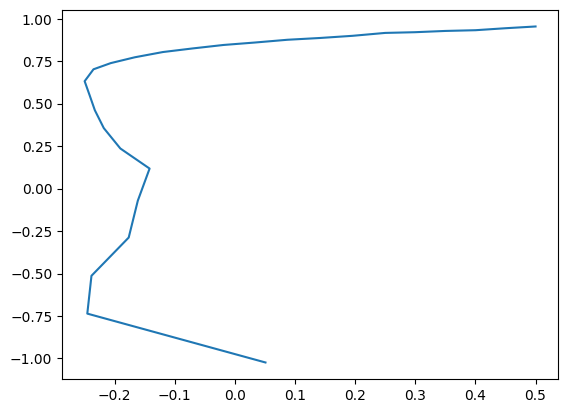

In [88]:
plt.plot(ps[0,:],xs[0,:])

[ 4  9 25  9]
